In [104]:
import pandas as pd
import re
import string
import collections
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import pickle
from sklearn.compose import ColumnTransformer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\simon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [82]:
df = pd.read_csv('./FakeData.csv')


In [83]:
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


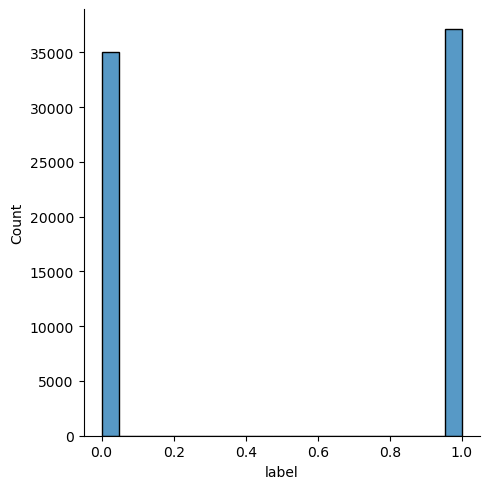

In [85]:
sns.displot(df, x='label')

In [86]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71537 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  71537 non-null  int64 
 1   title       71537 non-null  object
 2   text        71537 non-null  object
 3   label       71537 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.7+ MB


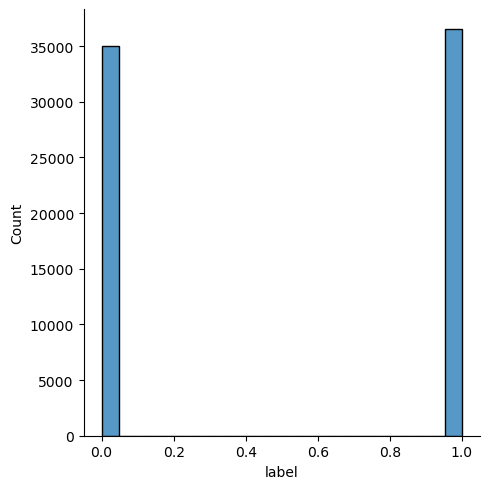

In [87]:
sns.displot(df, x='label')

In [105]:

def removeStopwordsAndLower(text):
    stop_words = set(stopwords.words('english')) 
    words = text.lower().split() 
    filtered_words = [word for word in words if word not in stop_words] 
    return ' '.join(filtered_words)
def lemaAndStem(text):
    stemmer = SnowballStemmer("english")
    # wnl = WordNetLemmatizer()
    normalized_text = []
    for word in text.split():
        stemmed_word = stemmer.stem(word)
        normalized_text.append(stemmed_word)
    return ' '.join(normalized_text).replace(',', '')

df['text'] = df['text'].apply(removeStopwordsAndLower)
df['title'] = df['title'].apply(removeStopwordsAndLower)
df['text'] = df['text'].apply(lemaAndStem)
df['title'] = df['title'].apply(lemaAndStem)


In [106]:
df

,Unnamed: 0,title,text,label
0,0,law enforc high alert follow threat cop white ...,comment expect barack obama member #fyf911 #fu...,1
2,2,unbelievable! obama attorney general say charl...,demonstr gather last night exerci constitut pr...,1
3,3,bobbi jindal rai hindu use stori christian con...,dozen polit activ pastor came privat dinner fr...,0
4,4,satan 2: russia unv imag terrifi new supernuk ...,rs-28 sarmat missil dub satan 2 replac ss-18 f...,1
5,5,time! christian group sue amazon splc design h...,say one time someon su southern poverti law ce...,1
...,...,...,...,...
72129,72129,russian steal research trump hack u.s. democra...,washington (reuters) - hacker believ work russ...,0
72130,72130,watch: giuliani demand democrat apolog trump r...,know fantasyland republican never question cit...,1
72131,72131,migrant refus leav train refug camp hungari,migrant refus leav train refug camp hungari th...,0
72132,72132,trump tussl give unpopular mexican leader much...,mexico citi (reuters) - donald trump combat st...,0


In [107]:
x = df[['text', 'title']]
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

Text(0, 0.5, 'Frecuencia')

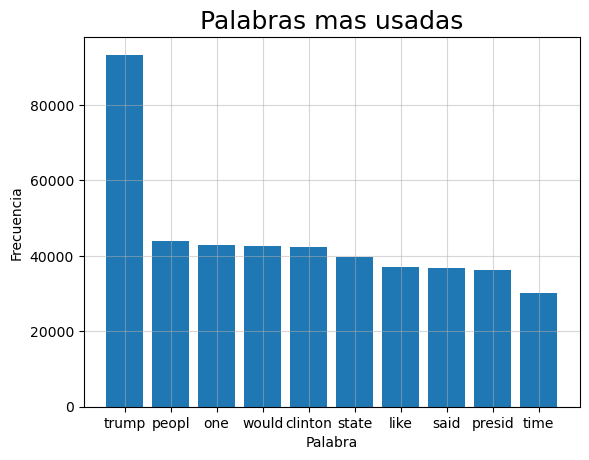

In [108]:
words = []
for text in df[df.label == 1]['text']:
    words.extend(text.split())
word_count = collections.Counter(words)
top_words = dict(word_count.most_common(10))


plt.bar(range(len(top_words)), list(top_words.values()), align = 'center')

plt.xticks(range(len(top_words)), list(top_words.keys()))

plt.grid(alpha = 0.5)

plt.title('Palabras mas usadas', fontsize = 18)
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

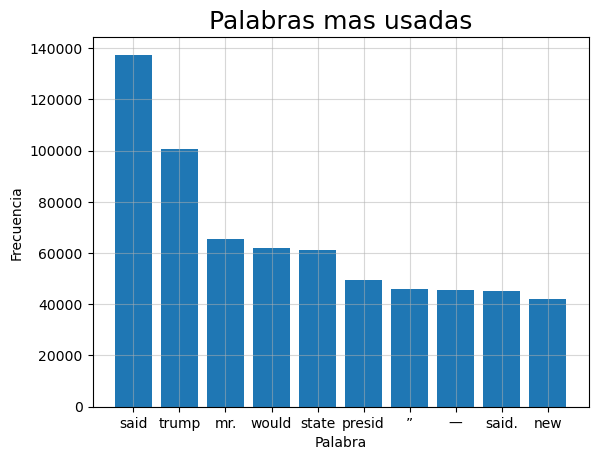

In [109]:
words = []
for text in df[df.label == 0]['text']:
    words.extend(text.split())
word_count = collections.Counter(words)
top_words = dict(word_count.most_common(10))


plt.bar(range(len(top_words)), list(top_words.values()), align = 'center')

plt.xticks(range(len(top_words)), list(top_words.keys()))

plt.grid(alpha = 0.5)

plt.title('Palabras mas usadas', fontsize = 18)
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')

In [110]:
count_vect = CountVectorizer()
# transformer = make_column_transformer((count_vect, 'col 1'), (vectorizer, 'col 2'))

# Define the CountVectorizer and TfidfTransformer separately for each column
count_vect_text = CountVectorizer()
count_vect_title = CountVectorizer()

tfidf_transformer_text = TfidfTransformer(use_idf=False)
tfidf_transformer_title = TfidfTransformer(use_idf=False)

# Define the pipeline for each column
text_pipeline = Pipeline([
    ('count_vect_text', count_vect_text),
    ('tfidf_transformer_text', tfidf_transformer_text)
])

title_pipeline = Pipeline([
    ('count_vect_title', count_vect_title),
    ('tfidf_transformer_title', tfidf_transformer_title)
])

# Use ColumnTransformer to apply the pipeline to each column
preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_pipeline, 'text'),
        ('title', title_pipeline, 'title')
    ]
)

# Fit and transform the data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [169]:
# pickle.dump(vcModel, open('transformModel_vcModel.pkl', 'wb'))
# pickle.dump(tf_transformer, open('transformModel_tf_transformer.pkl', 'wb'))
preprocessorFile = 'preprocessor.pkl'
pickle.dump(preprocessor, open(preprocessorFile, 'wb'))

In [111]:
parameters = {
    'learning_rate':[1, 0.5, 0.1, 0.05], 
    'n_estimators': [150, 200, 250],
    'max_depth': [3, 6, 8, 10]
}
brt = XGBClassifier()
clf = RandomizedSearchCV(estimator=brt, param_distributions=parameters, cv= 2)
clf.fit(X_train_transformed, y_train)


RandomizedSearchCV(cv=2,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'learning_rate': [1, 0.5, 0.1, 0.05],
                                        'max_depth': [3, 6, 8, 10],
                                        'n_estimators': [150, 200, 250]})

In [113]:
parameters2 = {
    'criterion':['gini', 'entropy', 'log_loss'], 
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [None, 4, 6, 10]
}
brt2 = RandomForestClassifier()
clf2 = RandomizedSearchCV(estimator=brt2, param_distributions=parameters2, cv= 2)
clf2.fit(X_train_transformed, y_train)

RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None, 4, 6, 10],
                                        'n_estimators': [100, 150, 200, 250]})

In [116]:
print('XGBoost best params:      ' ,clf.best_params_)
print('Random Forets best params:' ,clf2.best_params_)

XGBoost best params:       {'n_estimators': 150, 'max_depth': 8, 'learning_rate': 0.5}
Random Forets best params: {'n_estimators': 250, 'max_depth': None, 'criterion': 'gini'}


In [117]:
model = XGBClassifier(learning_rate=0.5, n_estimators=150,max_depth= 8)
model.fit(X_train_transformed, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [119]:
model2= RandomForestClassifier(criterion = 'gini', max_depth = None, n_estimators = 250)
model2.fit(X_train_transformed, y_train)

RandomForestClassifier(n_estimators=250)

In [120]:
print('XGBoost score:     ', model.score(X_test_transformed, y_test))
print('Random Fores score:', model2.score(X_test_transformed, y_test))

XGBoost score:      0.9829466032988537
Random Fores score: 0.9545708694436679


In [121]:
modelResult1 = ['XGBoost: ']
modelResult2 = ['Random Forest: ']

predictions = model.predict(X_test_transformed)
predictions2 = model2.predict(X_test_transformed)

modelResult1.append(f1_score(y_test, predictions, average='weighted'))
modelResult2.append(f1_score(y_test, predictions2, average='weighted'))

modelResult1.append(recall_score(y_test, predictions, average='macro'))
modelResult2.append(recall_score(y_test, predictions2, average='macro'))

modelResult1.append(precision_score(y_test, predictions, average='macro'))
modelResult2.append(precision_score(y_test, predictions2, average='macro'))

pd.DataFrame([modelResult1, modelResult2], columns=['Model', 'F1 score', 'Recall score', 'Precision_score']) 

,Model,F1 score,Recall score,Precision_score
0,XGBoost:,0.982943,0.982798,0.983162
1,Random Forest:,0.954563,0.954421,0.954730


[Text(0, 0.5, 'Verdadero'),
 Text(0.5, 0, 'Predecido'),
 Text(0.5, 1.0, 'Matriz de confision modelo XGBoost')]

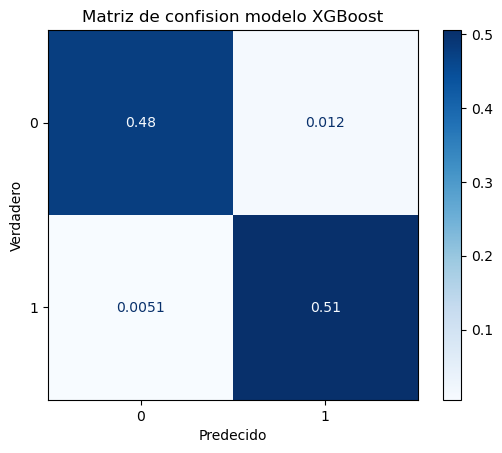

In [122]:
cm = confusion_matrix(y_test, predictions, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=[0, 1])
cmd.plot(cmap=plt.cm.Blues)
cmd.ax_.set(xlabel='Predecido', ylabel='Verdadero', title='Matriz de confision modelo XGBoost')

[Text(0, 0.5, 'Verdadero'),
 Text(0.5, 0, 'Predecido'),
 Text(0.5, 1.0, 'Matriz de confision modelo Random Forest')]

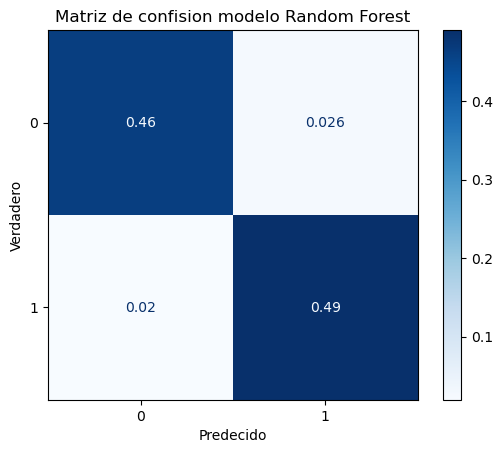

In [123]:
cm = confusion_matrix(y_test, predictions2, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=[0, 1])
cmd.plot(cmap=plt.cm.Blues)
cmd.ax_.set(xlabel='Predecido', ylabel='Verdadero', title='Matriz de confision modelo Random Forest')

In [181]:
dfForTest = pd.DataFrame([[''' Luke Mosseau The Warren County Finance and Budget Committee passed a resolution that will give the county greater flexibility to spend what is left of the $12 million the county received in federal ARPA money. The resolution attempts to make sure that ARPA funds that have gone unused make it back to the county’s general fund. During the COVID-19 Pandemic, Warren County was awarded roughly $12 million from ARPA, the American Rescue Plan Act, according to Warren County Administrator John Taflan. As groups such as local housing and healthcare providers came forward with requests to use that money, the county voted to “obligate” the funds to those groups, meaning under federal rules that “obligated” money is under contract with one of the groups or projects. If the county does not obligate all of the money, or if the group ends up not spending their money by the end of 2026, the federal government could require that the money is returned. The Wednesday May 8 resolution would move the unspent money into the general fund at the end of 2024. “We want to ensure that what’s not being obligated and/or expended by any ARPA recipient has a means to come back and stay here,” County Attorney Larry Elmen said. The county still has $3.3 million from the federal government that is obligated to groups and projects, but has either not yet been distributed to those entities or the entities have gotten the money but have not yet spent it, Taflan said. The resolution that passed this week replaces one approved at the end of last year. That resolution had said that any unspent ARPA money would have gone to mental health and homelessness issues at the end of this year. However, roughly $400,000 has already been obligated for mental health issues and has not yet been spent. “We think there are adequate resources for mental health and wellness,” Taflan said. “What we would like to do is ensure that money that is obligated is going to be spent by asking the people who have received the ARPA funding, if they’re confident enough that they’re going to spend the money by 2026.” The Warren County Planning Department reaches out to organizations like Glens Falls Hospital and Ascend Mental Wellness to review the progress of ARPA expenditure. “On a quarterly basis we reach out to everyone that’s received funding and we get a project status update to understand where they’re at with their project,” said Ethan Gaddy, Warren County planner. “We collect all the receipts from expenditures, have them self-report any obstacles to spending their funds, and then that helps us stay on top of where they are.” “This process has served us well because we have a clearer idea of where people are at with their projects and understanding where people are at with expenditures past 2024,” Gaddy added. If there are no plans to spend that money, Warren County would like to recoup the funds from these organizations—a complicated process since the funds are under contract. Recouping would involve going through the county attorney’s office and the county planning department, as well as coming to an agreement with the ARPA recipient, according to Taflan. The county established an ARPA committee that allocate those funds over a three-year period. The ARPA committee ended at the end of 2023 and all ARPA responsibility fell to the Warren County Finance and Budget Committee. The resolution to transfer unspent or un-obligated ARPA funds to the general fund at the end of 2024 will need to go before the Warren County Board of Supervisors for final approval.''', '''County moves to recalculate how ARPA funding is spent''']],
                  columns=['text', 'title'])

dfForTest['text'] = dfForTest['text'].apply(removeStopwordsAndLower)
dfForTest['title'] = dfForTest['title'].apply(removeStopwordsAndLower)
dfForTest['text'] = dfForTest['text'].apply(lemaAndStem)
dfForTest['title'] = dfForTest['title'].apply(lemaAndStem)

dfForTest = preprocessor.transform(dfForTest)
print(model.predict_proba(dfForTest))

[[0.6461203  0.35387972]]


In [166]:
modelFileSave = 'trained_model_XGBoost.pkl'
pickle.dump(model, open(modelFileSave, 'wb'))